In [1]:
!pip install lightning
import lightning as pl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import os
import torch
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
!pip install segmentation-models-pytorch
import segmentation_models_pytorch as smp
from PIL import Image
from pprint import pprint
from torch.utils.data import DataLoader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 19.1 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=ab194300124ceec4eb783f060b854a36d8857d06b07b944e24ba60f588ef04af
  Stored in directory: /root/.cache/pip/wheels/84/b9/90/25a0195cf95fb5533db96f1c77ea3f296b7cc86ae8ae48e3dc
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60966 sha256=068defe00fcf6a20d33a5c333cd70518fee20d578fa079648c1c9c3320221acf
  Stored in directory: /root/.cache/pip/w

In [4]:
### IMPORTANT ###
# This code cell uses a kaggle api to import the data set from the site. A kaggle.json file has to be imported to the current directory before running this cell
# Use this link to find how to get kaggle.json file: https://www.kaggle.com/general/74235

! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download surajghuwalewala/ham1000-segmentation-and-classification

!unzip /content/ham1000-segmentation-and-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: masks/ISIC_0029321_segmentation.png  
  inflating: masks/ISIC_0029322_segmentation.png  
  inflating: masks/ISIC_0029323_segmentation.png  
  inflating: masks/ISIC_0029324_segmentation.png  
  inflating: masks/ISIC_0029325_segmentation.png  
  inflating: masks/ISIC_0029326_segmentation.png  
  inflating: masks/ISIC_0029327_segmentation.png  
  inflating: masks/ISIC_0029328_segmentation.png  
  inflating: masks/ISIC_0029329_segmentation.png  
  inflating: masks/ISIC_0029330_segmentation.png  
  inflating: masks/ISIC_0029331_segmentation.png  
  inflating: masks/ISIC_0029332_segmentation.png  
  inflating: masks/ISIC_0029333_segmentation.png  
  inflating: masks/ISIC_0029334_segmentation.png  
  inflating: masks/ISIC_0029335_segmentation.png  
  inflating: masks/ISIC_0029336_segmentation.png  
  inflating: masks/ISIC_0029337_segmentation.png  
  inflating: masks/ISIC_0029338_segmentation.png  
  inflating: masks/ISIC_0029339

In [5]:
GT = pd.read_csv('/content/GroundTruth.csv')
gt = GT.sum().to_frame().reset_index().drop(0) #.to_frame()
gt.columns = ['toc', 'sum']

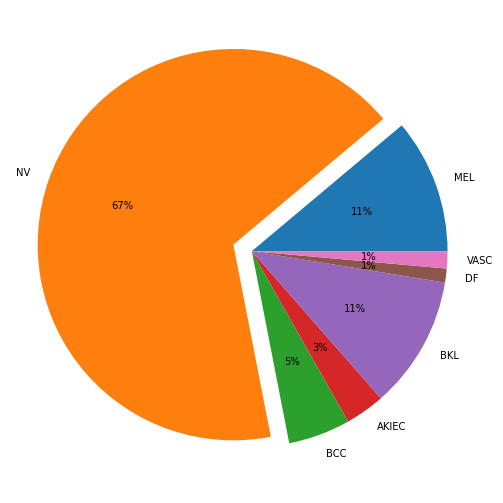

In [28]:
plt.figure(figsize=(15,9))

explode = [0, 0.1, 0, 0, 0, 0, 0]

plt.pie(gt['sum'], labels=gt['toc'],explode=explode, autopct='%.0f%%')

plt.show()

(450, 600, 3)


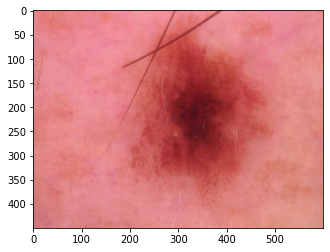

In [4]:
fpath=r'/content/images/ISIC_0024306.jpg'
img=plt.imread(fpath)
print (img.shape)
plt.imshow(img)

(450, 600)


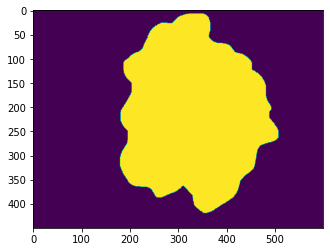

In [5]:
fpath=r'/content/masks/ISIC_0024306_segmentation.png'
img=plt.imread(fpath)
print(img.shape)
plt.imshow(img)

In [29]:
image_dir = '/content/images'
image_filenames = sorted(os.listdir(image_dir))
images = []
for filename in image_filenames:
  try:
    image =Image.open(os.path.join(image_dir, filename))
    images.append(image)
  except:
    continue

mask_dir = '/content/masks'
mask_filenames = sorted(os.listdir(mask_dir))
masks = []
for filename in mask_filenames:
  mask = Image.open(os.path.join(mask_dir, filename))
  masks.append(mask)

In [30]:
transform = transforms.Compose([
  transforms.Resize((128, 128)),
  transforms.ToTensor(),
])

In [21]:
resized_images = []
for image in images[:4000]:
  resized_image = transform(image)
  resized_images.append(resized_image)

In [47]:
# resized_images = []
# for image in images[:4000]:
#   resized_image = transform(image)
#   resized_images.append(resized_image)

resized_masks = []
for mask in masks[:]:
  resized_mask = transform(mask)
  if resized_mask.squeeze()[0][0]*resized_mask.squeeze()[0][-1]*resized_mask.squeeze()[-1][0]*resized_mask.squeeze()[-1][-1] == 1:
    resized_mask = -resized_mask.round()+1
  resized_masks.append(resized_mask.round())

In [48]:
lesion_fracs = []
for i in range(len(resized_masks)):
  uniques, vc = np.unique(resized_masks[i].numpy(), return_counts=True)
  if len(vc) == 1:
    lesion_fracs.append(0)
  else:
    lesion_fracs.append(vc[1]/(vc[0]+vc[1]))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


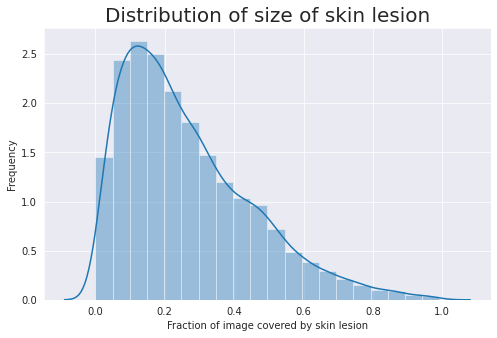

In [50]:
lfs = pd.DataFrame(lesion_fracs)

plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
sns.distplot(lfs, bins = 20)
plt.title('Distribution of size of skin lesion', fontdict={'size': 20})
plt.xlabel('Fraction of image covered by skin lesion', fontdict={'size': 10})
plt.ylabel('Frequency', fontdict={'size': 10})
plt.show()

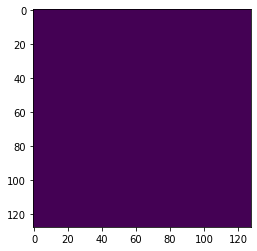

In [23]:
plt.imshow(resized_masks[1736].squeeze())

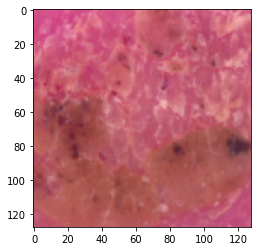

In [22]:
plt.imshow(resized_images[1736].permute(1, 2, 0))

In [ ]:
from sklearn.model_selection import train_test_split

train_images,test_images, train_masks,test_masks = train_test_split(resized_images,resized_masks,test_size=0.05)
test_images,val_images, test_masks,val_masks = train_test_split(test_images,test_masks,test_size=0.5)

In [ ]:
train_dataset = []
for i in range(len(train_images)):
   train_dataset.append([train_images[i], train_masks[i]])
val_dataset = []
for i in range(len(val_images)):
   val_dataset.append([val_images[i], val_masks[i]])
test_dataset = []
for i in range(len(test_images)):
   test_dataset.append([test_images[i], test_masks[i]])

In [ ]:
n_cpu = os.cpu_count()
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=n_cpu)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=n_cpu)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=n_cpu)

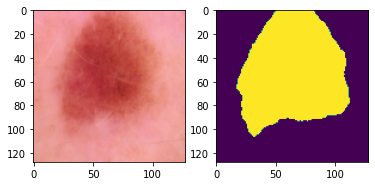

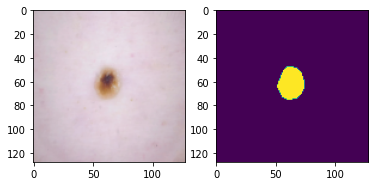

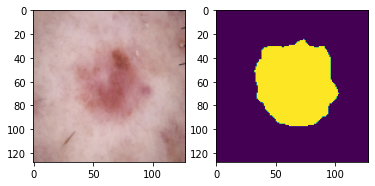

In [ ]:
sample_train = train_dataset[0]
plt.subplot(1,2,1)
plt.imshow(sample_train[0].permute(1, 2, 0)) #permuting the order to HWC
plt.subplot(1,2,2)
plt.imshow(sample_train[1].squeeze())
plt.show()

sample_val = val_dataset[0]
plt.subplot(1,2,1)
plt.imshow(sample_val[0].permute(1, 2, 0))
plt.subplot(1,2,2)
plt.imshow(sample_val[1].squeeze())
plt.show()

sample_test = test_dataset[1]
plt.subplot(1,2,1)
plt.imshow(sample_test[0].permute(1, 2, 0))
plt.subplot(1,2,2)
plt.imshow(sample_test[1].squeeze())
plt.show()
     

In [ ]:
class SegmentationModel(pl.LightningModule):

    def __init__(self, arch, encoder_name, in_channels, out_classes, **kwargs):
        super().__init__()
        self.model = smp.create_model(
            arch, encoder_name=encoder_name, in_channels=in_channels, classes=out_classes, **kwargs
        )

        # preprocessing parameteres for image
        params = smp.encoders.get_preprocessing_params(encoder_name)
        self.register_buffer("std", torch.tensor(params["std"]).view(1, 3, 1, 1))
        self.register_buffer("mean", torch.tensor(params["mean"]).view(1, 3, 1, 1))

        # dice loss as loss function for binary image segmentation
        self.loss_fn = smp.losses.DiceLoss(mode='binary', from_logits=True)

    def forward(self, image):
        image = (image - self.mean) / self.std
        mask = self.model(image)
        return mask

    def _step(self, batch, stage):
        
        image = batch[0]        # Shape of the image : (batch_size, num_channels, height, width)
        mask = batch[1]

        logits_mask = self.forward(image)
        loss = self.loss_fn(logits_mask, mask)

        prob_mask = logits_mask.sigmoid()
        pred_mask = (prob_mask > 0.5).float()

        tp, fp, fn, tn = smp.metrics.get_stats(pred_mask.long(), mask.long(), mode="binary")
        return {"loss": loss, "tp": tp, "fp": fp, "fn": fn, "tn": tn,}

    def _epoch_end(self, outputs, stage):

        tp = torch.cat([x["tp"] for x in outputs])
        fp = torch.cat([x["fp"] for x in outputs])
        fn = torch.cat([x["fn"] for x in outputs])
        tn = torch.cat([x["tn"] for x in outputs])

        # micro-imagewise - first calculate IoU score for each image and then compute mean over these scores
        per_image_iou = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro-imagewise")

        metrics = {
            f"{stage}_per_image_iou": per_image_iou,
            }
        
        self.log_dict(metrics, prog_bar=True)

    def training_step(self, batch, batch_idx):
        return self._step(batch, "train")

    def training_epoch_end(self, outputs):
        return self._epoch_end(outputs, "train")

    def validation_step(self, batch, batch_idx):
        return self._step(batch, "valid")

    def validation_epoch_end(self, outputs):
        return self._epoch_end(outputs, "valid")

    def test_step(self, batch, batch_idx):
        return self._step(batch, "test")

    def test_epoch_end(self, outputs):
        return self._epoch_end(outputs, "test")

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.0001)

In [ ]:
model = SegmentationModel("Unet", "resnet34", in_channels=3, out_classes=1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
trainer = pl.Trainer(gpus=1, max_epochs=20)

trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

/usr/local/lib/python3.8/dist-packages/lightning/pytorch/trainer/connectors/accelerator_connector.py:441: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name    | Type     | Params
---------------------------------

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [ ]:
valid_metrics = trainer.validate(model, dataloaders=val_dataloader, verbose=False)
pprint(valid_metrics)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

[{'valid_per_image_iou': 0.8698487877845764}]


In [ ]:
test_metrics = trainer.test(model, dataloaders=test_dataloader, verbose=False)
pprint(test_metrics)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

[{'test_per_image_iou': 0.8582696914672852}]


per_image_iou =  tensor(0.9752)


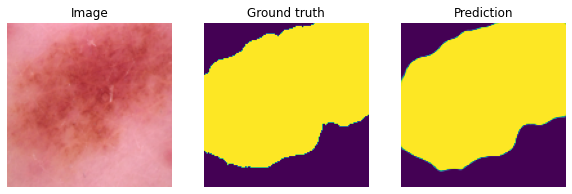

-----------------------------------------------------------------
per_image_iou =  tensor(0.7828)


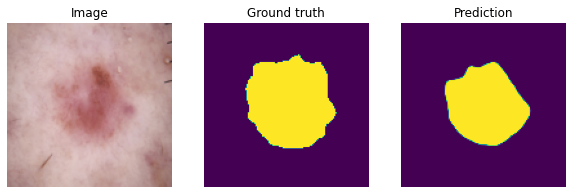

-----------------------------------------------------------------
per_image_iou =  tensor(0.9760)


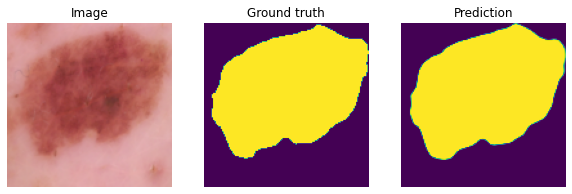

-----------------------------------------------------------------
per_image_iou =  tensor(0.8608)


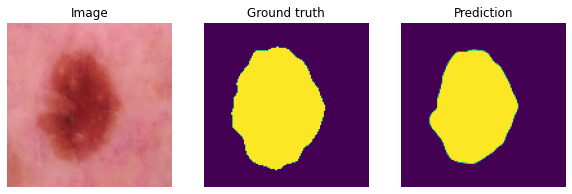

-----------------------------------------------------------------
per_image_iou =  tensor(0.9743)


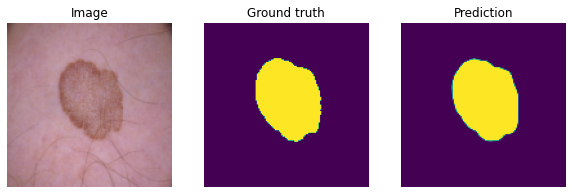

-----------------------------------------------------------------
per_image_iou =  tensor(0.9642)


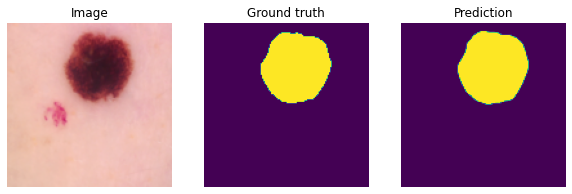

-----------------------------------------------------------------
per_image_iou =  tensor(0.9029)


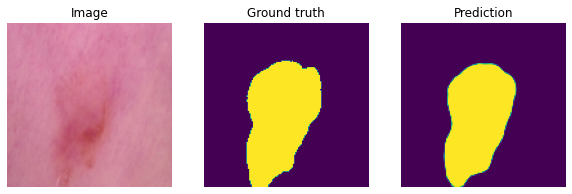

-----------------------------------------------------------------
per_image_iou =  tensor(0.9330)


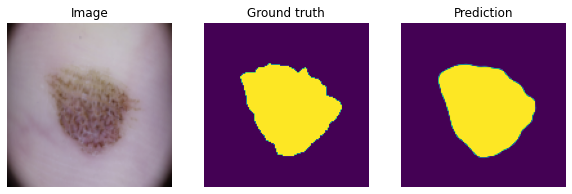

-----------------------------------------------------------------
per_image_iou =  tensor(0.2266)


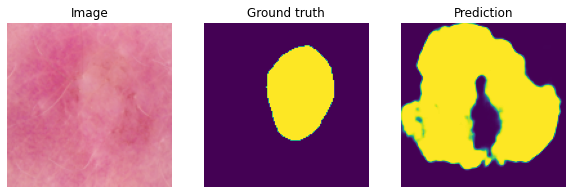

-----------------------------------------------------------------
per_image_iou =  tensor(0.9753)


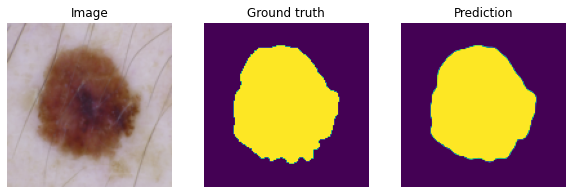

-----------------------------------------------------------------
per_image_iou =  tensor(0.9454)


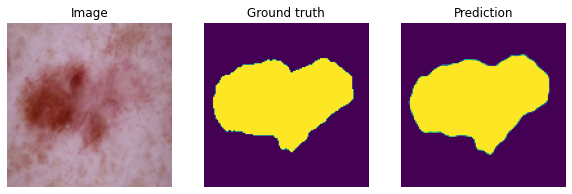

-----------------------------------------------------------------
per_image_iou =  tensor(0.3554)


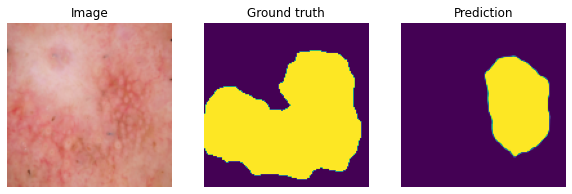

-----------------------------------------------------------------
per_image_iou =  tensor(0.9216)


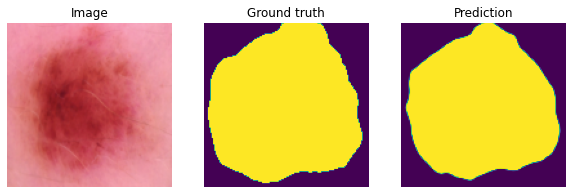

-----------------------------------------------------------------
per_image_iou =  tensor(0.9287)


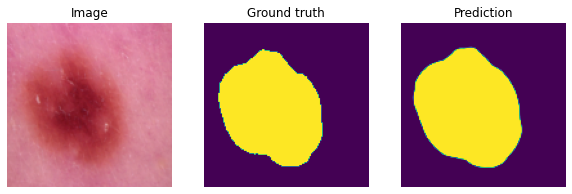

-----------------------------------------------------------------
per_image_iou =  tensor(0.9770)


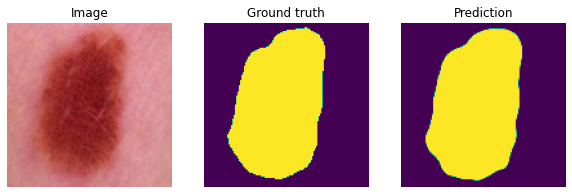

-----------------------------------------------------------------
per_image_iou =  tensor(0.9398)


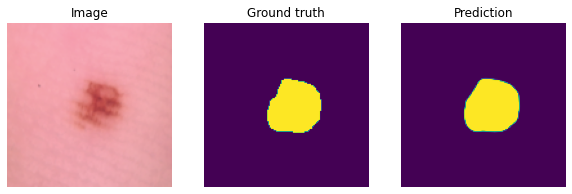

-----------------------------------------------------------------
per_image_iou =  tensor(0.9403)


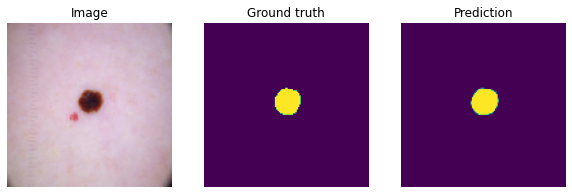

-----------------------------------------------------------------
per_image_iou =  tensor(0.9489)


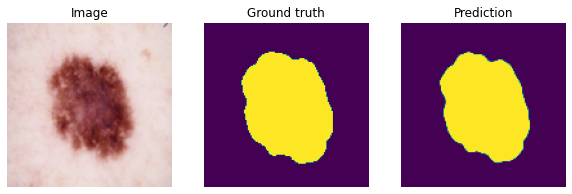

-----------------------------------------------------------------
per_image_iou =  tensor(0.7687)


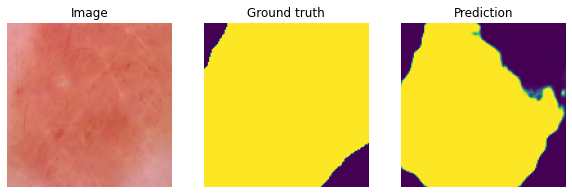

-----------------------------------------------------------------
per_image_iou =  tensor(0.8903)


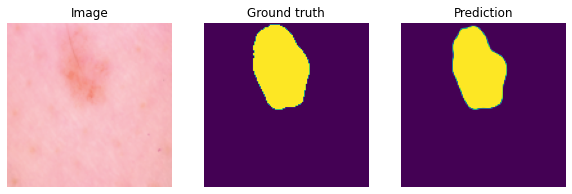

-----------------------------------------------------------------
per_image_iou =  tensor(0.9533)


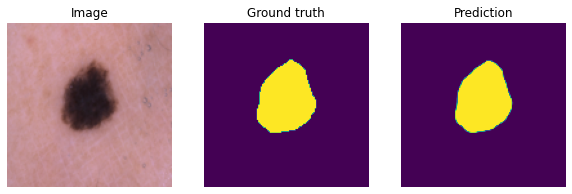

-----------------------------------------------------------------
per_image_iou =  tensor(0.9142)


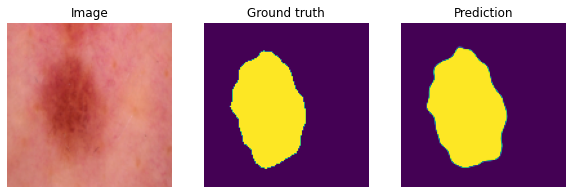

-----------------------------------------------------------------
per_image_iou =  tensor(0.8931)


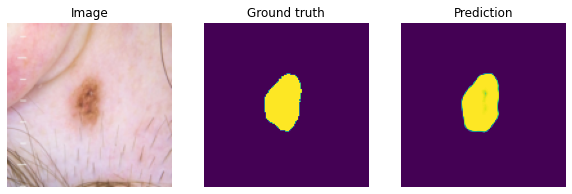

-----------------------------------------------------------------
per_image_iou =  tensor(0.8061)


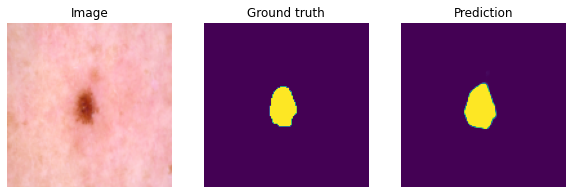

-----------------------------------------------------------------
per_image_iou =  tensor(0.9455)


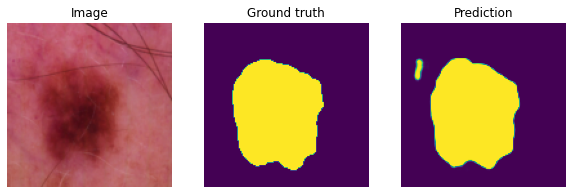

-----------------------------------------------------------------
per_image_iou =  tensor(0.9615)


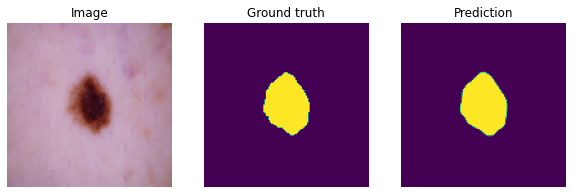

-----------------------------------------------------------------
per_image_iou =  tensor(0.8350)


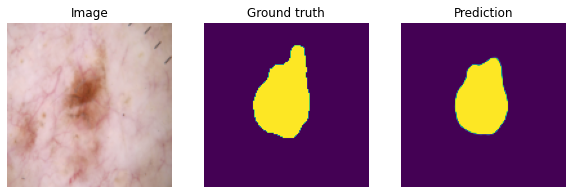

-----------------------------------------------------------------
per_image_iou =  tensor(0.3579)


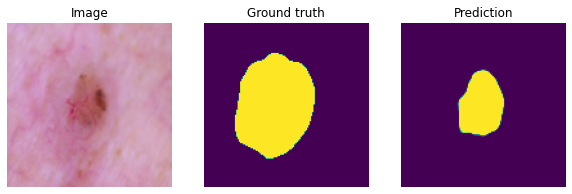

-----------------------------------------------------------------
per_image_iou =  tensor(0.7873)


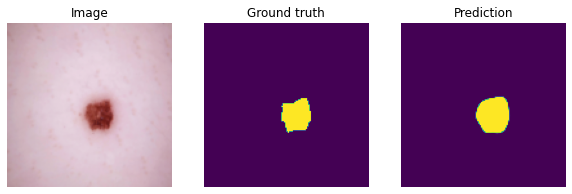

-----------------------------------------------------------------
per_image_iou =  tensor(0.9332)


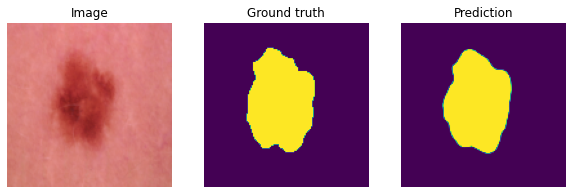

-----------------------------------------------------------------
per_image_iou =  tensor(0.9056)


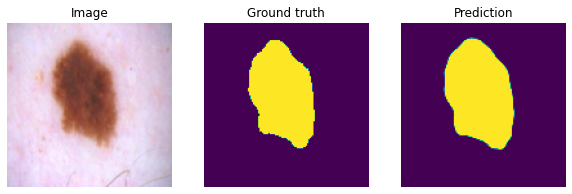

-----------------------------------------------------------------
per_image_iou =  tensor(0.9633)


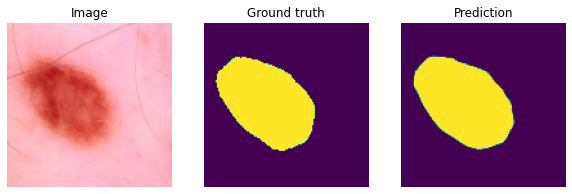

-----------------------------------------------------------------
per_image_iou =  tensor(0.4876)


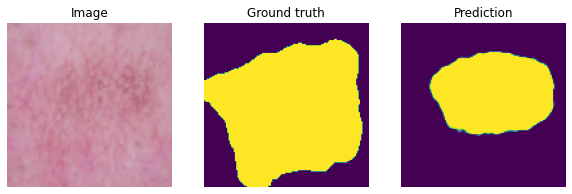

-----------------------------------------------------------------
per_image_iou =  tensor(0.8203)


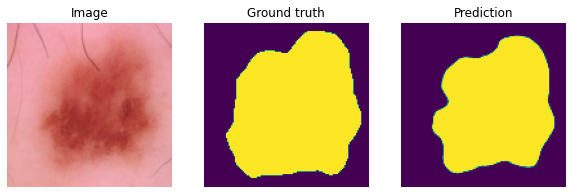

-----------------------------------------------------------------
per_image_iou =  tensor(0.9456)


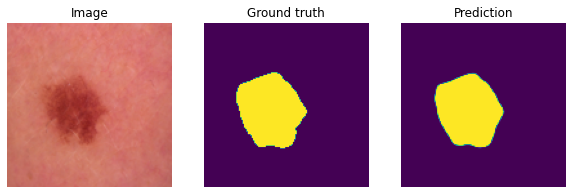

-----------------------------------------------------------------
per_image_iou =  tensor(0.7837)


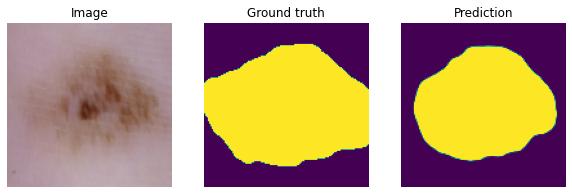

-----------------------------------------------------------------
per_image_iou =  tensor(0.9569)


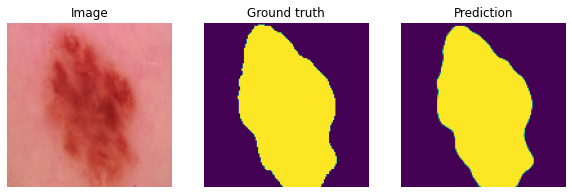

-----------------------------------------------------------------
per_image_iou =  tensor(0.9442)


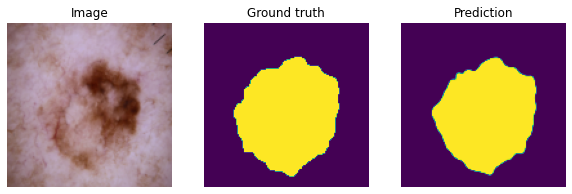

-----------------------------------------------------------------
per_image_iou =  tensor(0.9295)


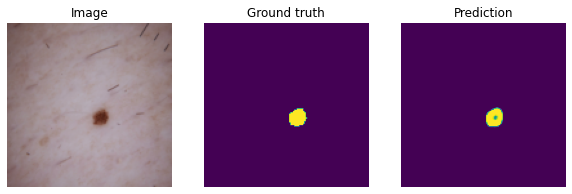

-----------------------------------------------------------------
per_image_iou =  tensor(0.9603)


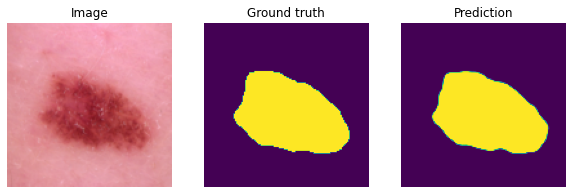

-----------------------------------------------------------------
per_image_iou =  tensor(0.9559)


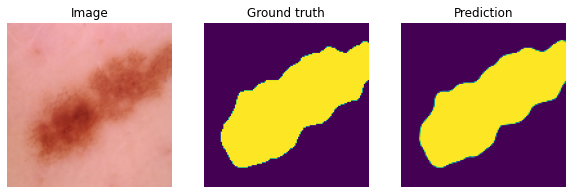

-----------------------------------------------------------------
per_image_iou =  tensor(0.8238)


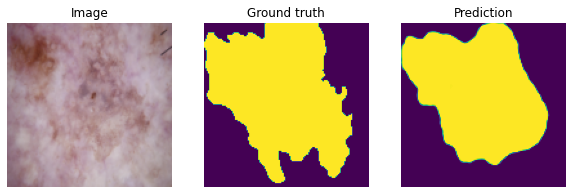

-----------------------------------------------------------------
per_image_iou =  tensor(0.8367)


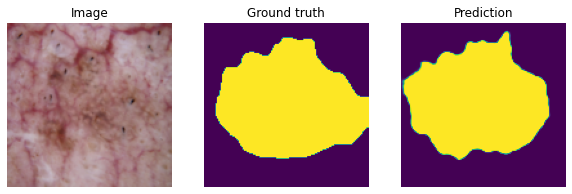

-----------------------------------------------------------------
per_image_iou =  tensor(0.)


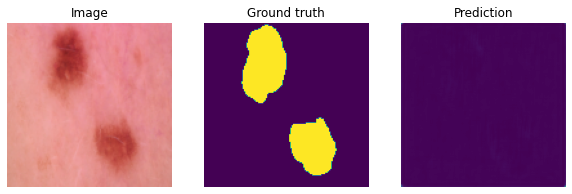

-----------------------------------------------------------------
per_image_iou =  tensor(0.9607)


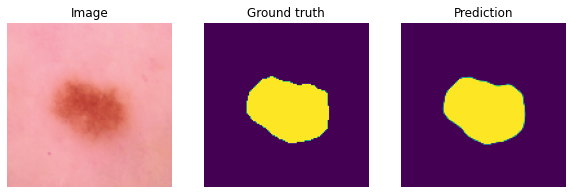

-----------------------------------------------------------------
per_image_iou =  tensor(0.7945)


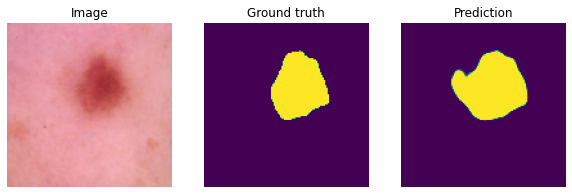

-----------------------------------------------------------------
per_image_iou =  tensor(0.9705)


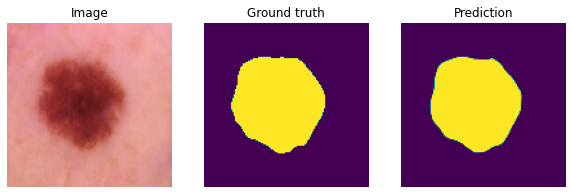

-----------------------------------------------------------------
per_image_iou =  tensor(0.9266)


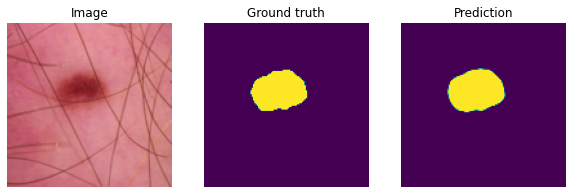

-----------------------------------------------------------------
per_image_iou =  tensor(0.8513)


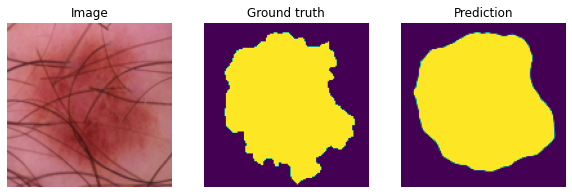

-----------------------------------------------------------------
per_image_iou =  tensor(0.9139)


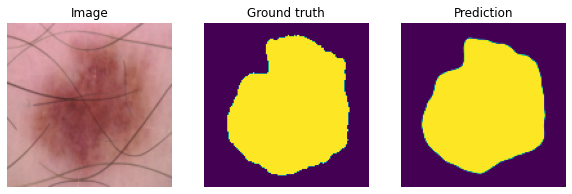

-----------------------------------------------------------------
per_image_iou =  tensor(0.9803)


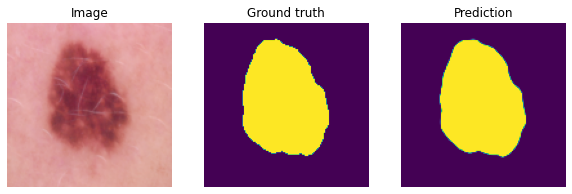

-----------------------------------------------------------------
per_image_iou =  tensor(0.9123)


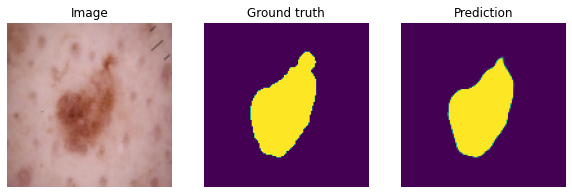

-----------------------------------------------------------------
per_image_iou =  tensor(0.9247)


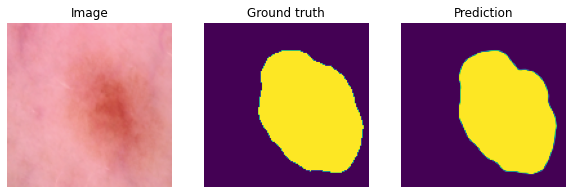

-----------------------------------------------------------------
per_image_iou =  tensor(0.9651)


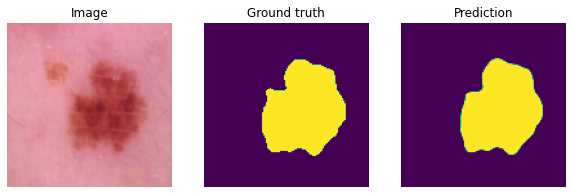

-----------------------------------------------------------------
per_image_iou =  tensor(0.8867)


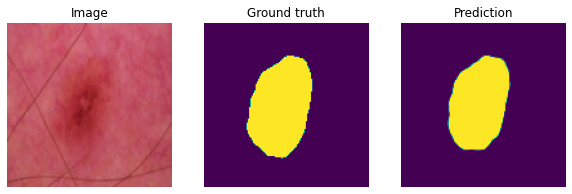

-----------------------------------------------------------------
per_image_iou =  tensor(0.8808)


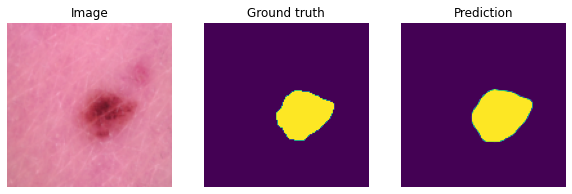

-----------------------------------------------------------------
per_image_iou =  tensor(0.9413)


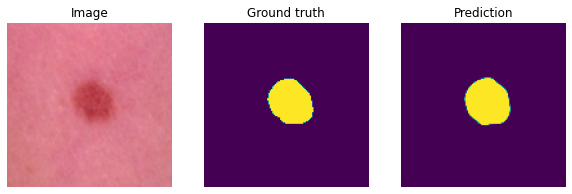

-----------------------------------------------------------------
per_image_iou =  tensor(0.9293)


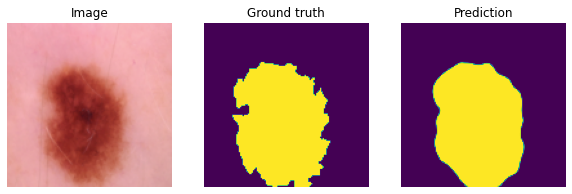

-----------------------------------------------------------------
per_image_iou =  tensor(0.8974)


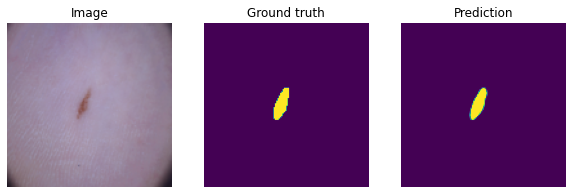

-----------------------------------------------------------------
per_image_iou =  tensor(0.9350)


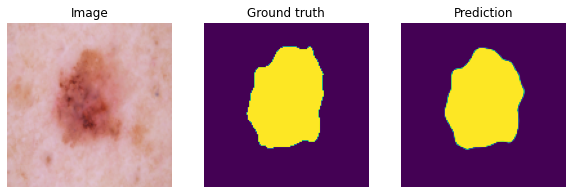

-----------------------------------------------------------------
per_image_iou =  tensor(0.8318)


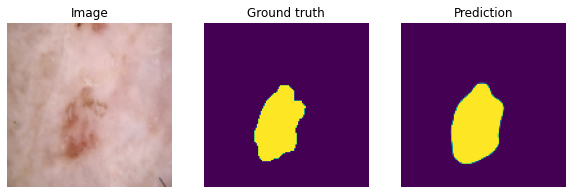

-----------------------------------------------------------------
per_image_iou =  tensor(0.9360)


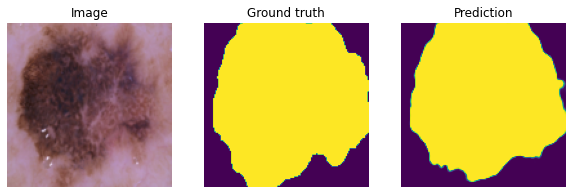

-----------------------------------------------------------------
per_image_iou =  tensor(0.4265)


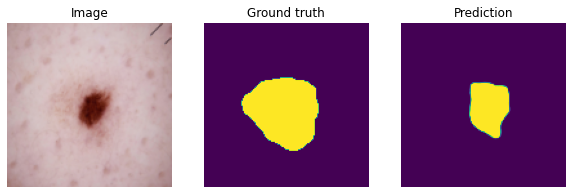

-----------------------------------------------------------------
per_image_iou =  tensor(0.7903)


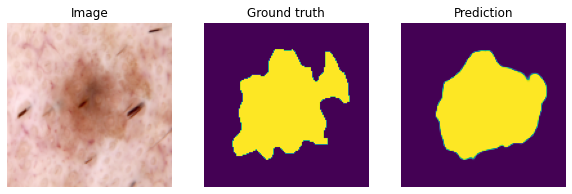

-----------------------------------------------------------------
per_image_iou =  tensor(0.9243)


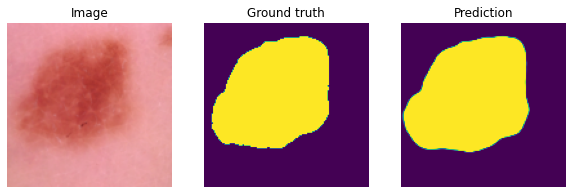

-----------------------------------------------------------------
per_image_iou =  tensor(0.8683)


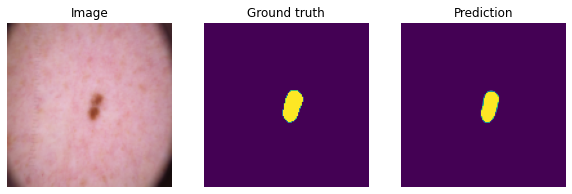

-----------------------------------------------------------------
per_image_iou =  tensor(0.9590)


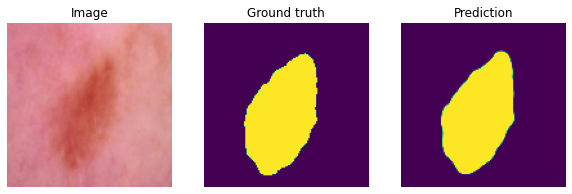

-----------------------------------------------------------------
per_image_iou =  tensor(0.8894)


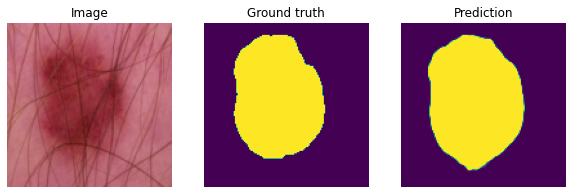

-----------------------------------------------------------------
per_image_iou =  tensor(0.7149)


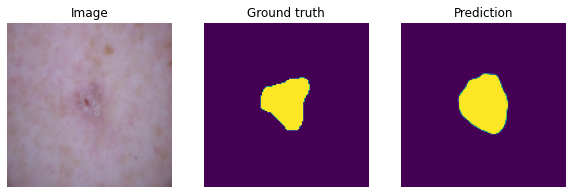

-----------------------------------------------------------------
per_image_iou =  tensor(0.8998)


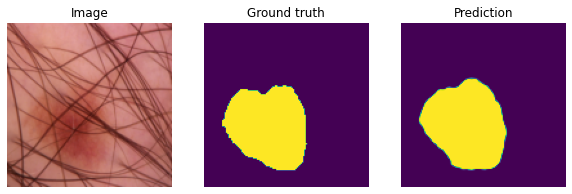

-----------------------------------------------------------------
per_image_iou =  tensor(0.8678)


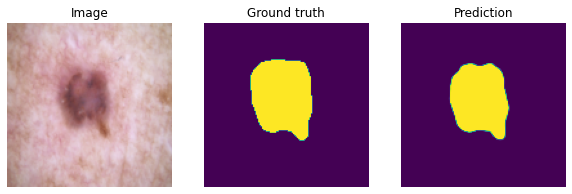

-----------------------------------------------------------------
per_image_iou =  tensor(0.9668)


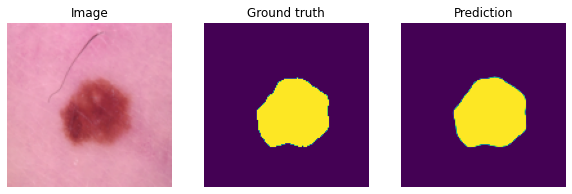

-----------------------------------------------------------------
per_image_iou =  tensor(0.7851)


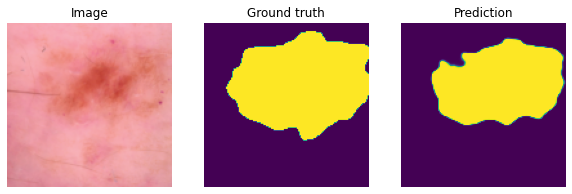

-----------------------------------------------------------------
per_image_iou =  tensor(0.9343)


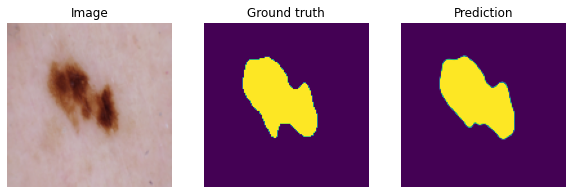

-----------------------------------------------------------------
per_image_iou =  tensor(0.9029)


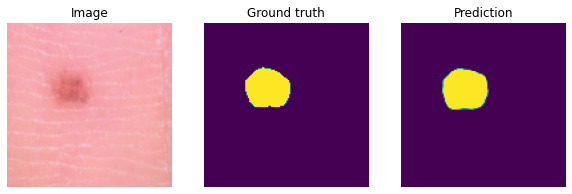

-----------------------------------------------------------------
per_image_iou =  tensor(0.8592)


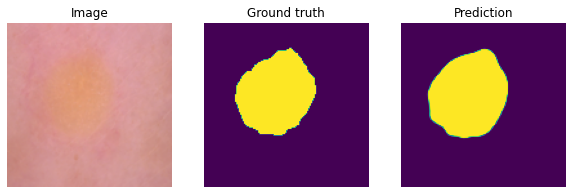

-----------------------------------------------------------------
per_image_iou =  tensor(0.9531)


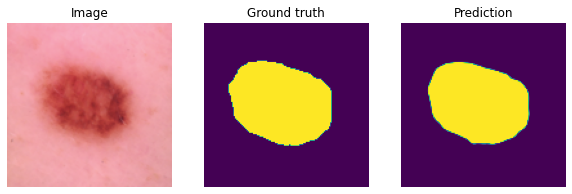

-----------------------------------------------------------------
per_image_iou =  tensor(0.8500)


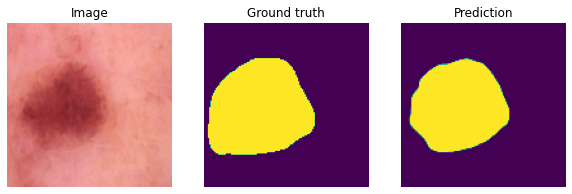

-----------------------------------------------------------------
per_image_iou =  tensor(0.8651)


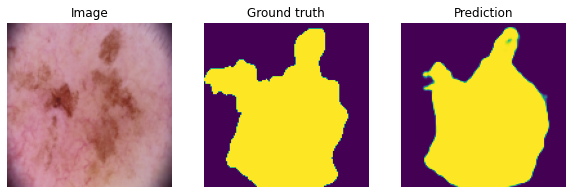

-----------------------------------------------------------------
per_image_iou =  tensor(0.9593)


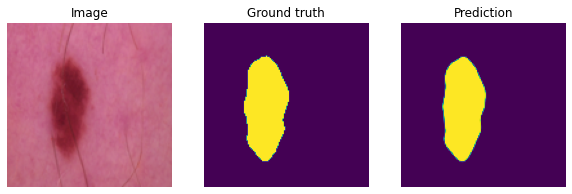

-----------------------------------------------------------------
per_image_iou =  tensor(0.9760)


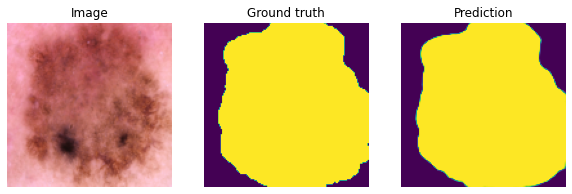

-----------------------------------------------------------------
per_image_iou =  tensor(0.9256)


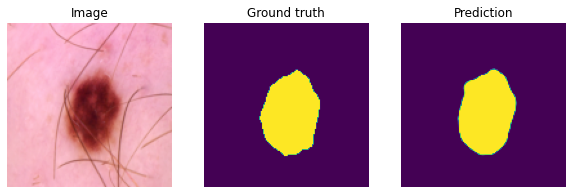

-----------------------------------------------------------------
per_image_iou =  tensor(0.9672)


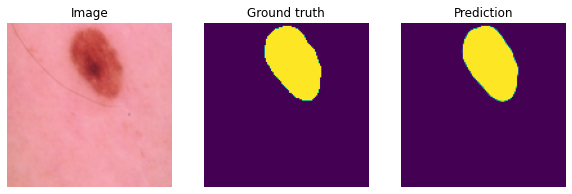

-----------------------------------------------------------------
per_image_iou =  tensor(0.9723)


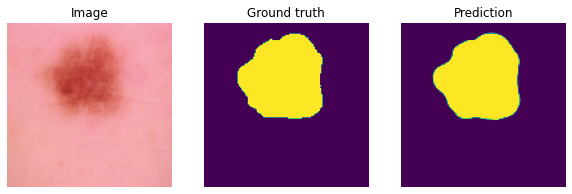

-----------------------------------------------------------------
per_image_iou =  tensor(0.9693)


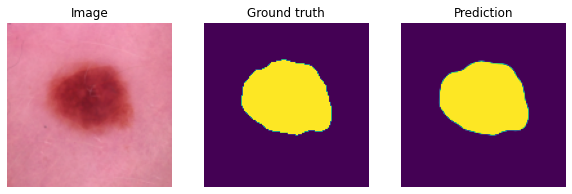

-----------------------------------------------------------------
per_image_iou =  tensor(0.9606)


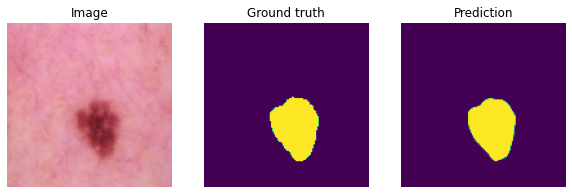

-----------------------------------------------------------------
per_image_iou =  tensor(0.8784)


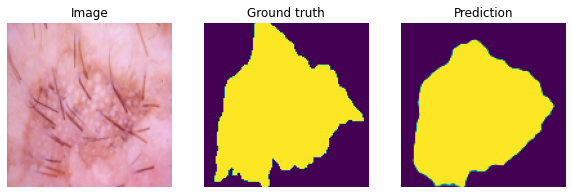

-----------------------------------------------------------------
per_image_iou =  tensor(0.7874)


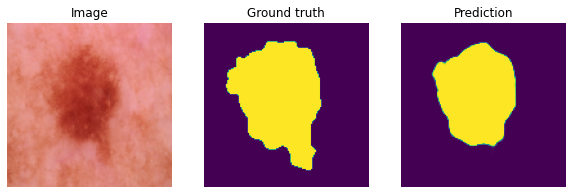

-----------------------------------------------------------------
per_image_iou =  tensor(0.7557)


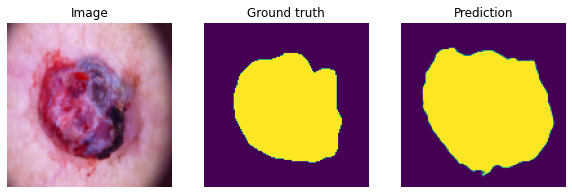

-----------------------------------------------------------------
per_image_iou =  tensor(0.8045)


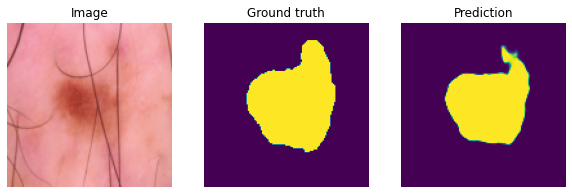

-----------------------------------------------------------------
per_image_iou =  tensor(0.9196)


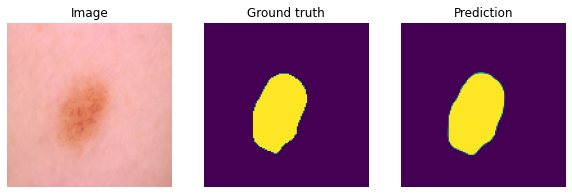

-----------------------------------------------------------------
per_image_iou =  tensor(0.8458)


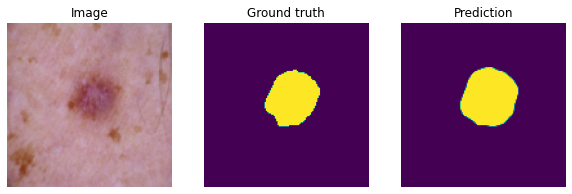

-----------------------------------------------------------------
per_image_iou =  tensor(0.9549)


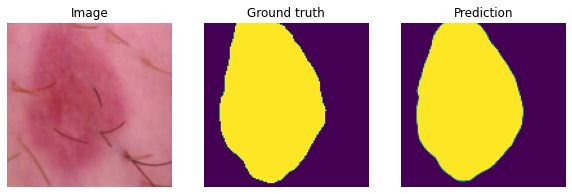

-----------------------------------------------------------------
per_image_iou =  tensor(0.8475)


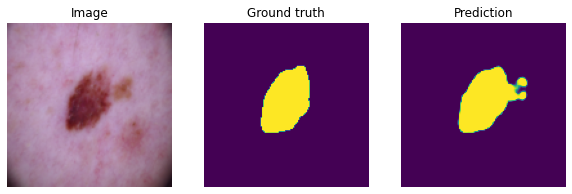

-----------------------------------------------------------------
per_image_iou =  tensor(0.8721)


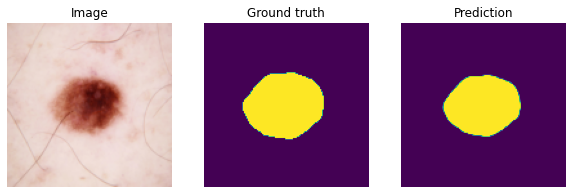

-----------------------------------------------------------------
per_image_iou =  tensor(0.9212)


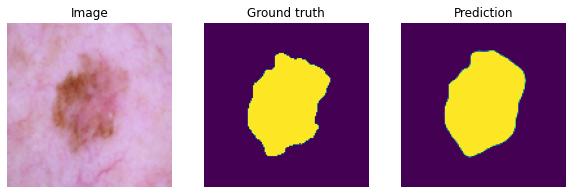

-----------------------------------------------------------------
per_image_iou =  tensor(0.9217)


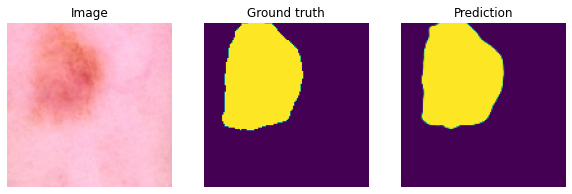

-----------------------------------------------------------------
per_image_iou =  tensor(0.7899)


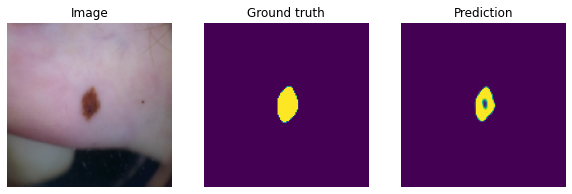

-----------------------------------------------------------------
per_image_iou =  tensor(0.9681)


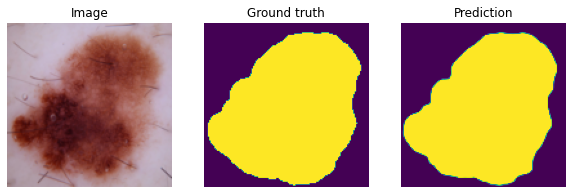

-----------------------------------------------------------------
per_image_iou =  tensor(0.0471)


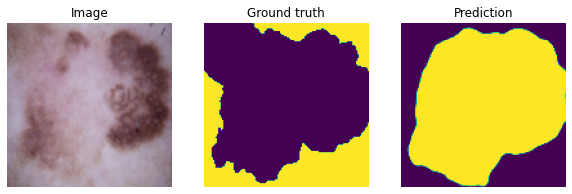

-----------------------------------------------------------------


In [ ]:
for batch in test_dataloader:
  with torch.no_grad():
      model.eval()
      logits = model(batch[0])
  pr_masks = logits.sigmoid()

  for image, gt_mask, pr_mask in zip(batch[0], batch[1], pr_masks):
      plt.figure(figsize=(10, 5))

      plt.subplot(1, 3, 1)
      plt.imshow(image.numpy().transpose(1, 2, 0))
      plt.title("Image")
      plt.axis("off")

      plt.subplot(1, 3, 2)
      plt.imshow(gt_mask.numpy().squeeze())
      plt.title("Ground truth")
      plt.axis("off")

      plt.subplot(1, 3, 3)
      plt.imshow(pr_mask.numpy().squeeze())
      plt.title("Prediction")
      plt.axis("off")

      tp, fp, fn, tn = smp.metrics.get_stats(pr_mask.round().long().unsqueeze(0), gt_mask.long().unsqueeze(0), mode="binary")
      per_image_iou = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro-imagewise")
      print('per_image_iou = ',per_image_iou)

      plt.show()

      print('-----------------------------------------------------------------')

In [ ]:
model

SegmentationModel(
  (model): Unet(
    (encoder): ResNetEncoder(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1